In [10]:
# chart result of cnv_realign

In [21]:
# params
import os
import sys

IN_BED = os.path.expanduser("/tmp/cnv_realign.57706.bed")

In [22]:
# read bed file
bed = []
with open(IN_BED) as f:
    for line in f:
        if line.startswith("chr"):
            bed_line = line.strip().split()
            bed.append(bed_line)

"read %d lines" % len(bed)

'read 100 lines'

In [23]:
bed[0]

['chr1', '56367001', '56369001', 'TP', '0']

In [24]:
# extract data histograms
import matplotlib.pyplot as plt
import numpy as np

fp = np.array([float(x[4]) for x in bed if x[3] == "FP"])
tp = np.array([float(x[4]) for x in bed if x[3] == "TP"])
print("tp", tp)
print("fp", fp)

tp [ 0.  0. 14. 26.  0.  0.  0.  2.  0.  0. 10.  0.  0.  1.  0. 26.  0.  0.
  0.  0.  0.  0.  0.  0. 17. 22.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.]
fp [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0.]


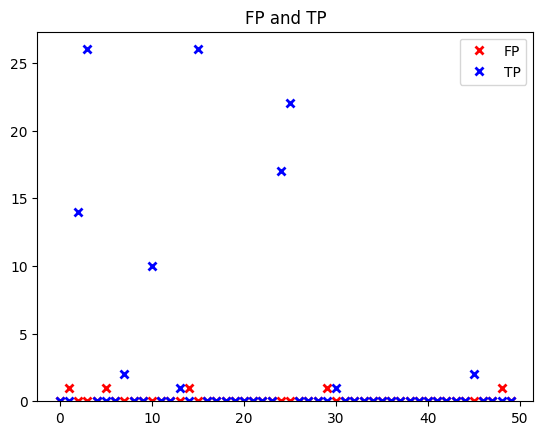

In [25]:

fig, ax = plt.subplots()

# clip
tp = np.clip(tp, None, 50)
fp = np.clip(fp, None, 50)

# Plot FP in red
ax.plot(range(len(fp)), fp, 'x', markeredgewidth=2, markeredgecolor='red', label='FP')

# Plot TP in blue
ax.plot(range(len(tp)), tp, 'x', markeredgewidth=2, markeredgecolor='blue', label='TP')

# Force y-axis to start at 0
ax.set_ylim(bottom=0)

# Add title and legend
plt.title("FP and TP")
plt.legend()

plt.show()